In [43]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('data/z-score.csv')

In [45]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [46]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


<Axes: xlabel='cgpa', ylabel='Count'>

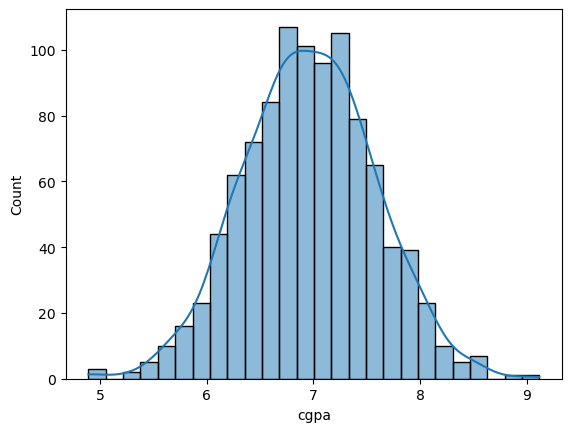

In [48]:
sns.histplot(df['cgpa'],kde=True)

In [49]:
df['cgpa'].skew()

-0.014529938929314918

In [50]:
# by calculating 3 std
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()

In [51]:
lower_limit,upper_limit

(5.113546374602832, 8.808933625397168)

In [52]:
# detect how many ouliers are
df[(df['cgpa'] < lower_limit) | (df['cgpa'] > upper_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [53]:
# by z-score 
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [54]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [55]:
# detect the outliers
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# we have two techniques 
1) Trimming
2) Capping

# Trimming

In [58]:
newdf = df[(df['cgpa'] > lower_limit) & (df['cgpa'] < upper_limit)]

In [60]:
newdf.shape

(995, 4)

In [61]:
newdf.sample(3)

,cgpa,placement_exam_marks,placed,cgpa_zscore
83,7.38,20.0,1,0.679918
421,6.29,46.0,0,-1.089856
846,6.99,97.0,0,0.046696


In [70]:
newdf['cgpa'].describe()

count    995.000000
mean       6.963357
std        0.600082
min        5.230000
25%        6.550000
50%        6.960000
75%        7.365000
max        8.620000
Name: cgpa, dtype: float64

# capping

In [65]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [67]:
df.shape

(1000, 4)

In [69]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64